# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '/Users/bananaiselite/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

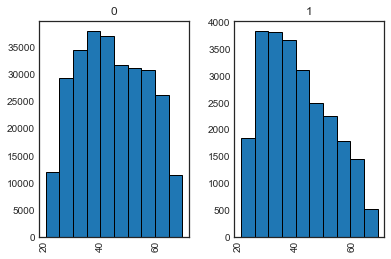

In [6]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
plt.style.use('seaborn-white')
app_train.hist('YEARS_BIRTH', by = 'TARGET', edgecolor= 'k')
plt.show()

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
#等頻劃分成十等份
app_train["equal_freq_income"] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)
app_train["equal_freq_income"].value_counts().sort_values(ascending = False)

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: equal_freq_income, dtype: int64

0.08072881945686496


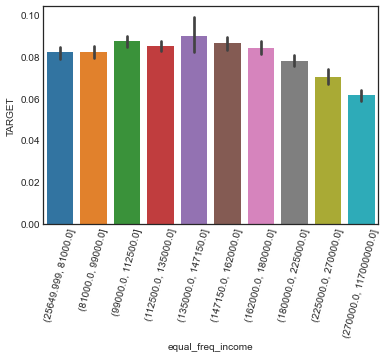

In [8]:
import seaborn as sns
px = app_train["equal_freq_income"]
py = app_train['TARGET']
print(py.mean())

sns.barplot(px, py)
plt.xticks(rotation = 75)
plt.show()

接著使用等寬劃分來觀察，由於等寬容易受outliers影響，所以先將其去除

In [9]:
#subset
INCOME_TARGET = app_train[['AMT_INCOME_TOTAL', 'TARGET']]
#3標準差法
Upper = INCOME_TARGET['AMT_INCOME_TOTAL'].mean() + 3*INCOME_TARGET['AMT_INCOME_TOTAL'].std()
Lower = INCOME_TARGET['AMT_INCOME_TOTAL'].mean() - 3*INCOME_TARGET['AMT_INCOME_TOTAL'].std()
keep_index= (INCOME_TARGET['AMT_INCOME_TOTAL']> Lower) & (INCOME_TARGET['AMT_INCOME_TOTAL']< Upper)
INCOME_TARGET[keep_index]

,AMT_INCOME_TOTAL,TARGET
0,202500.0,1
1,270000.0,0
2,67500.0,0
3,135000.0,0
4,121500.0,0
...,...,...
307506,157500.0,0
307507,72000.0,0
307508,153000.0,0
307509,171000.0,1


In [10]:
cut_bins = np.linspace(INCOME_TARGET[keep_index]['AMT_INCOME_TOTAL'].min(),INCOME_TARGET[keep_index]['AMT_INCOME_TOTAL'].max(), 10)
app_train["equal_width_income"] = pd.cut(app_train['AMT_INCOME_TOTAL'], cut_bins)
app_train["equal_width_income"].value_counts()

(120300.0, 214950.0]    134430
(25650.0, 120300.0]     103351
(214950.0, 309600.0]     47542
(309600.0, 404250.0]     14178
(404250.0, 498900.0]      5303
(498900.0, 593550.0]      1094
(593550.0, 688200.0]       861
(688200.0, 782850.0]       166
(782850.0, 877500.0]       130
Name: equal_width_income, dtype: int64

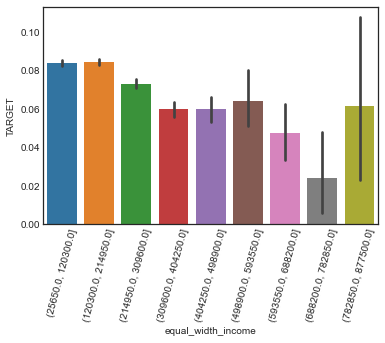

In [12]:
px = app_train["equal_width_income"]
py = app_train['TARGET']

sns.barplot(px, py)
plt.xticks(rotation = 75)
plt.show()